# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\saicharan\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data['price']= resource_data['price']

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

       price  
55660  20.00  
76127  27.53

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

#project_data.drop["project_essay_1","project_essay_2","project_essay_3","project_essay_4"]

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

       price clean_categories                 clean_subcategories  \
55660  20.00     Math_Science  AppliedSciences Health_LifeScience   
76127  27.53     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:15<00:00, 806.41it/s]


In [449]:
project_data['essay']=preprocessed_essays

In [19]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also

preprocessed_title=[]
for tit in tqdm(project_data['project_title'].values):
    tit = decontracted(tit)
    tit = tit.replace('\\r', ' ')
    tit = tit.replace('\\"', ' ')
    tit = tit.replace('\\n', ' ')
    tit = re.sub('[^A-Za-z0-9]+', ' ', tit)
    tit = ' '.join(e for e in tit.split() if e not in stopwords)
    preprocessed_title.append(tit.lower().strip())    
print(preprocessed_title[23])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 17852.85it/s]


techies training


In [473]:
project_data['project_title']= preprocessed_title

### preprocessing of 'project_grade_category'


In [739]:
p=[]
for tit in (project_data["project_grade_category"].values):
    tit = tit.replace(" ", "_")
    tit = tit.replace("-", "_")
    p.append(tit.lower().strip())    

In [740]:
project_data["project_grade_category"]=p

## 1.5 Preparing data for models

In [19]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [21]:
# removing special characters
import re
cleaned_prefix = []    

for prefix in (project_data['teacher_prefix'].values):
    prefix = re.sub('[^A-Za-z0-9]+', ' ', str(prefix))
    cleaned_prefix.append(prefix)

vectorizer = CountVectorizer(vocabulary=set(cleaned_prefix),lowercase=True, binary=True)
vectorizer.fit(cleaned_prefix)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(cleaned_prefix)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr ', 'Mr ', 'Mrs ', 'Ms ', 'Teacher', 'nan']
Shape of matrix after one hot encodig  (109248, 6)


In [22]:
# how to drop unamed columns : https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
project_data.rename({"Unnamed: 0" :"a"},axis="columns",inplace=True)
project_data.drop(["project_essay_1","project_essay_2","project_essay_3","project_essay_4","id","a"],axis=1, inplace=True)
project_data.drop(["teacher_id"],axis=1, inplace=True)

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Trees</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

### Here we are taking 100k points due to limited memory 

In [741]:
data = project_data[:100001]
data.head(2)

teacher_prefix school_state                Date project_grade_category  \
55660           Mrs.           CA 2016-04-27 00:27:36          grades_prek_2   
76127            Ms.           UT 2016-04-27 00:31:25             grades_3_5   

                             project_title  \
55660  engineering steam primary classroom   
76127                  sensory tools focus   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

       price clean_categories                 clean_subcategories  \
55660  20.00     Math_Science  AppliedSciences Health_LifeScience   
76127  27.53     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  fortunate enough use fairy tale stem kits clas...  
76127  imagine 8 9 years old third grade classroom se...

In [742]:
y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)

In [743]:
data.head(2)

teacher_prefix school_state                Date project_grade_category  \
55660           Mrs.           CA 2016-04-27 00:27:36          grades_prek_2   
76127            Ms.           UT 2016-04-27 00:31:25             grades_3_5   

                             project_title  \
55660  engineering steam primary classroom   
76127                  sensory tools focus   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  price clean_categories  \
55660                                            53  20.00     Math_Science   
76127                                             4  27.53     SpecialNeeds   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   

                                                   essay  
55660  fortunate enough use fairy tale stem kits clas...  
76127  imagine 8 9 years old third grade classroom se...

In [744]:
X=data

In [745]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [749]:
# one hot encoding for "School_state "
state = CountVectorizer()
state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = state.transform(X_train['school_state'].values)
X_cv_state_ohe = state.transform(X_cv['school_state'].values)
X_test_state_ohe = state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(state.get_feature_names())
print("="*100)

After vectorizations
(44890, 51) (44890,)
(22110, 51) (22110,)
(33001, 51) (33001,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [746]:
# one hot encoding for "project_grade_category"

grade = CountVectorizer()
grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(grade.get_feature_names())
print("="*100)

After vectorizations
(44890, 4) (44890,)
(22110, 4) (22110,)
(33001, 4) (33001,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [750]:
# one hot encoding for "clean_categories"

clean_cat= CountVectorizer()
clean_cat.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleancat_ohe = clean_cat.transform(X_train['clean_categories'].values)
X_cv_cleancat_ohe = clean_cat.transform(X_cv['clean_categories'].values)
X_test_cleancat_ohe = clean_cat.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cleancat_ohe.shape, y_train.shape)
print(X_cv_cleancat_ohe.shape, y_cv.shape)
print(X_test_cleancat_ohe.shape, y_test.shape)
print(clean_cat.get_feature_names())
print("="*100)

After vectorizations
(44890, 9) (44890,)
(22110, 9) (22110,)
(33001, 9) (33001,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [751]:
# one hot encoding for "clean_subcategories"

clean_subcat = CountVectorizer()
clean_subcat.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleansubcat_ohe = clean_subcat.transform(X_train['clean_subcategories'].values)
X_cv_cleansubcat_ohe = clean_subcat.transform(X_cv['clean_subcategories'].values)
X_test_cleansubcat_ohe = clean_subcat.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cleansubcat_ohe.shape, y_train.shape)
print(X_cv_cleansubcat_ohe.shape, y_cv.shape)
print(X_test_cleansubcat_ohe.shape, y_test.shape)
print(clean_subcat.get_feature_names())
print("="*100)

After vectorizations
(44890, 30) (44890,)
(22110, 30) (22110,)
(33001, 30) (33001,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [752]:
# vectorizing numerical features "teacher_number_of_previously_posted_projects"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prevpostproj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prevpostproj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prevpostproj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_prevpostproj_norm.shape, y_train.shape)
print(X_cv_prevpostproj_norm.shape, y_cv.shape)
print(X_test_prevpostproj_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 1) (44890,)
(22110, 1) (22110,)
(33001, 1) (33001,)


In [753]:
# vectorizing numerical features "price"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 1) (44890,)
(22110, 1) (22110,)
(33001, 1) (33001,)


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

## Bag of Words

In [619]:
# BOW for essay
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer()
vectorizer_bow.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 39655) (44890,)
(22110, 39655) (22110,)
(33001, 39655) (33001,)


In [536]:
# BOW for "project_title"
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 11204) (44890,)
(22110, 11204) (22110,)
(33001, 5000) (33001,)


## TF-IDF

In [657]:
#TF-idf for "essay"

from sklearn.feature_extraction.text import TfidfVectorizer
essay_tfidf = TfidfVectorizer()
essay_tfidf.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = essay_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = essay_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = essay_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 39655) (44890,)
(22110, 39655) (22110,)
(33001, 39655) (33001,)


In [662]:
#TF-idf for "Project_title"

title_tfidf = TfidfVectorizer()
title_tfidf.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = title_tfidf.transform(X_train['project_title'].values)
X_cv_title_tfidf = title_tfidf.transform(X_cv['project_title'].values)
X_test_title_tfidf = title_tfidf.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 11204) (44890,)
(22110, 11204) (22110,)
(33001, 11204) (33001,)


## Avg-W2V

In [98]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [99]:
# average Word2Vec for "essay" in training data

X_train_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avgw2v.append(vector)

print(len(X_train_essay_avgw2v))
print(len(X_train_essay_avgw2v[1]))

100%|██████████████████████████████████████████████████████████████████████████| 44890/44890 [00:38<00:00, 1155.89it/s]


44890
300


In [100]:
# average Word2Vec for "essay" in crossvalidation data

X_cv_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avgw2v.append(vector)

print(len(X_cv_essay_avgw2v))
print(len(X_cv_essay_avgw2v[1]))

100%|██████████████████████████████████████████████████████████████████████████| 22110/22110 [00:20<00:00, 1076.02it/s]


22110
300


In [101]:
# average Word2Vec for "essay" in test data

X_test_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avgw2v.append(vector)

print(len(X_test_essay_avgw2v))
print(len(X_test_essay_avgw2v[1]))

100%|██████████████████████████████████████████████████████████████████████████| 33001/33001 [00:29<00:00, 1118.49it/s]


33001
300


In [102]:
# average Word2Vec for "project_title" in training data

X_train_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avgw2v.append(vector)

print(len(X_train_title_avgw2v))
print(len(X_train_title_avgw2v[1]))

100%|█████████████████████████████████████████████████████████████████████████| 44890/44890 [00:01<00:00, 44197.35it/s]


44890
300


In [103]:
# average Word2Vec for "project_title" in crossvalidation data

X_cv_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avgw2v.append(vector)

print(len(X_cv_title_avgw2v))
print(len(X_cv_title_avgw2v[1]))

100%|█████████████████████████████████████████████████████████████████████████| 22110/22110 [00:00<00:00, 40917.20it/s]


22110
300


In [104]:
# average Word2Vec for "project_title" in test data

X_test_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avgw2v.append(vector)

print(len(X_test_title_avgw2v))
print(len(X_test_title_avgw2v[1]))

100%|█████████████████████████████████████████████████████████████████████████| 33001/33001 [00:00<00:00, 44775.55it/s]


33001
300


### TF-IDF Weighted W2v

In [471]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [472]:
# TF-IDF weighted Word2Vec for "essay" in training data

X_train_essay_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_weightw2v.append(vector)

print(len(X_train_essay_weightw2v))
print(len(X_train_essay_weightw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 44890/44890 [04:10<00:00, 179.05it/s]


44890
300


In [479]:
# TF-IDF weighted Word2Vec for "essay" in cross validation data

X_cv_essay_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_essay_weightw2v.append(vector)

print(len(X_cv_essay_weightw2v))
print(len(X_cv_essay_weightw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22110/22110 [01:44<00:00, 210.74it/s]


22110
300


In [480]:
# TF-IDF weighted Word2Vec for "essay" in cross test data

X_test_essay_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_weightw2v.append(vector)

print(len(X_test_essay_weightw2v))
print(len(X_test_essay_weightw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 33001/33001 [02:45<00:00, 199.05it/s]


33001
300


In [481]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_title = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [482]:
# TF-IDF weighted Word2Vec for "project_title" in training data

X_train_title_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_weightw2v.append(vector)

print(len(X_train_title_weightw2v))
print(len(X_train_title_weightw2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 44890/44890 [00:04<00:00, 9185.42it/s]


44890
300


In [483]:
# TF-IDF weighted Word2Vec for "project_title" in cross validation data

X_cv_title_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_title_weightw2v.append(vector)

print(len(X_cv_title_weightw2v))
print(len(X_cv_title_weightw2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22110/22110 [00:02<00:00, 9164.42it/s]


22110
300


In [484]:
# TF-IDF weighted Word2Vec for "project_title" in training data

X_test_title_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_weightw2v.append(vector)

print(len(X_test_title_weightw2v))
print(len(X_test_title_weightw2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33001/33001 [00:03<00:00, 9366.22it/s]


33001
300


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision tree on BOW,<font color='red'> SET 1</font>

In [771]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow,X_train_title_bow, X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_price_norm)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow,X_cv_title_bow, X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_price_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow,X_test_title_bow, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(44890, 50954) (44890,)
(22110, 50954) (22110,)
(33001, 50954) (33001,)


### Hyper parameter tuning using simple for loop

In [486]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [864]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

depth = [1, 5, 10, 50, 100, 500]
min_samp = [5,10,100,500]

#d = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500]
#s= [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]

def hypertune(x_train, y_train, x_cr, y_cr ):
    train_auc = []
    cv_auc = []
    de=[]
    sa=[]
    for dep in tqdm(depth):
        for minsamp in min_samp:
            dt_clf = DecisionTreeClassifier(max_depth = dep ,
                                            min_samples_split = minsamp,
                                            class_weight= "balanced"
                                            )
            dt_clf.fit(x_train, y_train)

            y_train_pred = batch_predict(dt_clf, x_train)    
            y_cv_pred = batch_predict(dt_clf, x_cr)

            # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
            # not the predicted outputs        
            train_auc.append(roc_auc_score(y_train,y_train_pred))
            cv_auc.append(roc_auc_score(y_cr, y_cv_pred))
            de.append(dep)
            sa.append(minsamp)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(de,sa,train_auc, c='r', marker='o')
    ax.plot(de,sa,cv_auc, c='g', marker='o')
    ax.set_xlabel('depth')
    ax.set_ylabel('min_sample')
    ax.set_zlabel('AUC',rotation=90)
    plt.title("Error Plots\n")
    plt.show()
            
    return train_auc,cv_auc 


In [501]:
def best_parameters(cv_auc, tr_auc):
    d = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500]
    s= [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]

    print("findind Best depth and Best Min_sample")
    
    plt.figure(figsize=(13,4)) 
    #cmap=sns.light_palette("blue")
    plt.subplot(1, 2, 1)
    df=pd.DataFrame({'Depth':d,'minsamp':s,'AUC':cv_auc})
    sns.heatmap(df.pivot_table(index='Depth',columns='minsamp',values='AUC'), annot=True)
    plt.xlabel('Depth')
    plt.ylabel('min_samp')
    plt.title("Heat map for CV_AUC")
   
    plt.subplot(1, 2, 2)
    df=pd.DataFrame({'Depth':d,'minsamp':s,'AUC':tr_auc})
    sns.heatmap(df.pivot_table(index='Depth',columns='minsamp',values='AUC'), annot=True)
    plt.xlabel('Depth')
    plt.ylabel('min_samp')
    plt.title("Heat map for TRAIN_AUC")
    plt.show()
   


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [17:46<00:00, 275.74s/it]

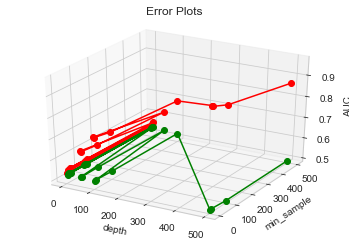

In [780]:
tr_auc_bow, cv_auc_bow = hypertune(X_tr_bow, y_train, X_cr_bow, y_cv)

In [782]:
c =tr_auc_bow
t =cv_auc_bow

findind Best depth and Best Min_sample


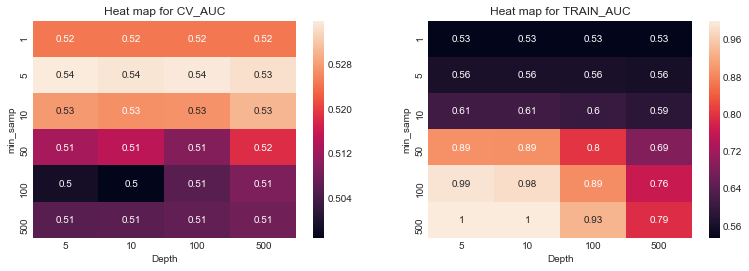

In [788]:
best_parameters(cv_auc_bow, tr_auc_bow)

In [799]:
best_d_bow = 50
best_s_bow = 500

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [801]:
# getting all features
vec1 = [] 
vec1.extend(vectorizer_bow.get_feature_names())
vec1.extend(vectorizer.get_feature_names())
vec1.extend(state.get_feature_names())
vec1.extend(clean_cat.get_feature_names())
vec1.extend(grade.get_feature_names())
vec1.extend(clean_subcat.get_feature_names())
vec1.extend(['price'])

In [806]:
# we are limiting max_depth to 3 for visualization purpose
c = DecisionTreeClassifier(max_depth = 3 
                            ,min_samples_split = 500,
                            class_weight ="balanced")
c.fit(X_tr_bow, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [843]:
graph = Source( tree.export_graphviz(c, out_file=None,
                                     feature_names=vec1,
                                     class_names=['Approved', 'rejected'],
                                     filled=True, rounded=True, ))
graph.format = 'PNG'
graph.render('bow_tree',view=True)

'bow_tree.png'

In [844]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "bow_tree.PNG")

### Roc Curve

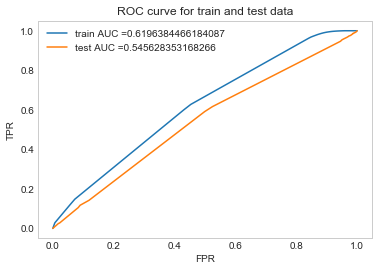

In [869]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_clf_bow = DecisionTreeClassifier(max_depth =best_d_bow , min_samples_split = best_s_bow, class_weight ="balanced")
                                          
dt_clf_bow.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_bow = batch_predict(dt_clf_bow, X_tr_bow)    
y_test_pred_bow = batch_predict(dt_clf_bow, X_te_bow)

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred_bow)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred_bow)

train_auc_bow = auc(train_fpr_bow, train_tpr_bow)
plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC ="+str(train_auc_bow ))

test_auc_bow = auc(test_fpr_bow, test_tpr_bow)
plt.plot(test_fpr_bow, test_tpr_bow, label="test AUC ="+str(test_auc_bow))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**summary**
From the above curves  we can clearly see that Area under the curve for test data is  low compared to the train data.AUC for both Train and Test data is above 50% ,but there is a 7%  percent difference between train and test Auc .so the model is sensible

### Confusion Matrix

In [646]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.24927125349908527 for threshold 0.461


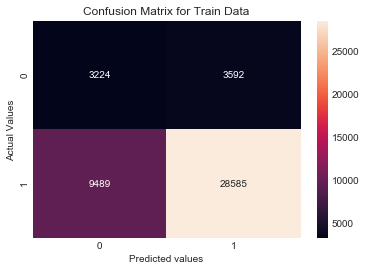

In [647]:
cm_1 = confusion_matrix(y_train, predict(y_train_pred_bow, tr_thresholds_bow, train_fpr_bow, train_fpr_bow))                   
cm_bow = pd.DataFrame(cm_1 , range(2))
sns.heatmap(cm_bow, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                     

the maximum value of tpr*(1-fpr) 0.24500735056832443 for threshold 0.461


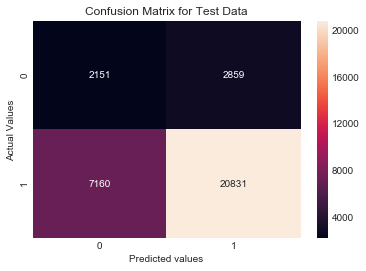

In [648]:
cm_1 = confusion_matrix(y_test, predict(y_test_pred_bow, te_thresholds_bow, test_fpr_bow, test_fpr_bow))                   
cm_bow = pd.DataFrame(cm_1 , range(2))
sns.heatmap(cm_bow, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

### Getting all False Positive datapoints

In [292]:
def get_FalsePositive(y_actual, y_hat):
    FP = 0
    fp=[]
    y=[]
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
           fp.append((X_test.iloc[i]))
           y.append( y_actual[i])
    F= pd.DataFrame(fp)
    F['Project_Approved']=y
    return F

In [293]:
fp_bow = get_FalsePositive(y_test, predict(y_test_pred_bow, te_thresholds_bow, test_fpr_bow, test_fpr_bow))

the maximum value of tpr*(1-fpr) 0.24980478165425632 for threshold 0.924


### Word cloud for Falsepositive points

In [238]:
# https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(9, 9))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

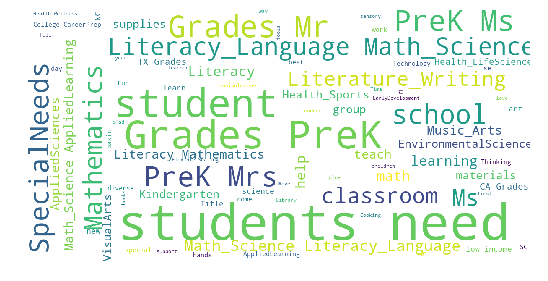

In [294]:
show_wordcloud(fp_bow)


### Box plot for False positive points

[(0.0, 2929.0)]

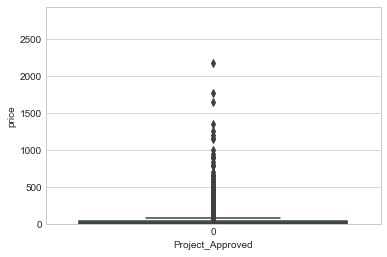

In [428]:
sns.set_style("whitegrid") 
  
ax = sns.boxplot(x = 'Project_Approved', y = 'price', data = falsepositive) 
ax.set(ylim=(min(fp_tfidfw2v['price']),max(fp_tfidfw2v['price'])))

### PDF for False positive points

[9.21689217e-01 4.59204592e-02 1.14801148e-02 7.38007380e-03
 2.87002870e-03 6.15006150e-03 1.23001230e-03 2.05002050e-03
 4.10004100e-04 8.20008200e-04]
[  0.   19.2  38.4  57.6  76.8  96.  115.2 134.4 153.6 172.8 192. ]


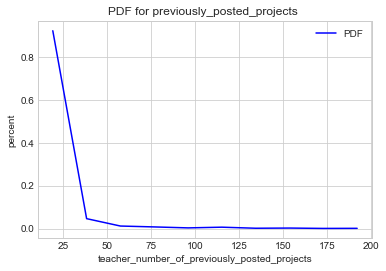

In [296]:
counts,bin_edges =np.histogram(efps['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('percent')
plt.title("PDF for previously_posted_projects ")
plt.legend()
plt.show()

### 2.4.2 Applying Decison Tree on TFIDF,<font color='red'> SET 2</font>

In [851]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf,X_cv_title_tfidf ,X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_price_norm)).tocsr()


### Hyper parameter tuning using simple for loop


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [31:56<00:00, 432.41s/it]

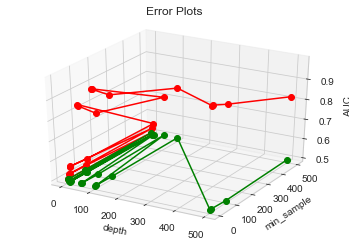

In [634]:
tr_auc_tfidf, cv_auc_tfidf = hypertune(X_tr_tfidf, y_train, X_cr_tfidf, y_cv)

findind Best depth and Best Min_sample


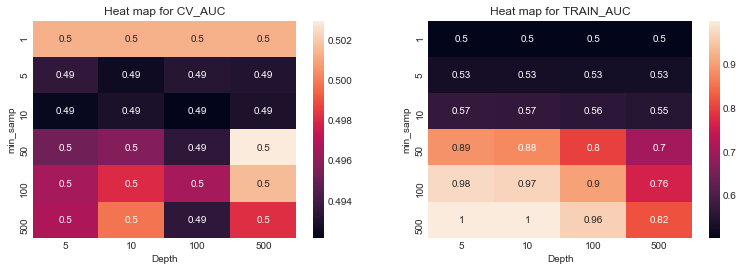

In [705]:
best_parameters(cv_auc_tfidf, tr_auc_tfidf)

In [834]:
best_d_tfidf = 50
best_s_tfidf= 500

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [852]:
vec2 = [] # getting all features
vec2.extend(essay_tfidf.get_feature_names())
vec2.extend(title_tfidf.get_feature_names())
vec2.extend(state.get_feature_names())
vec2.extend(clean_cat.get_feature_names())
vec2.extend(grade.get_feature_names())
vec2.extend(clean_subcat.get_feature_names())
vec2.extend(['price'])

In [853]:
# we are limiting tree to depth 3 for visulization
c = DecisionTreeClassifier(max_depth = 3 ,min_samples_split = 500)
c.fit(X_tr_tfidf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [854]:
graph = Source( tree.export_graphviz(c, out_file=None ,feature_names= vec2,class_names=['Approved', 'rejected'],
                                     filled=True, rounded=True, ))
graph.format = 'png'
graph.render('tfidf_tree',view=True)

'tfidf_tree.png'

In [856]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "tfidf_tree.png")

### ROC curve

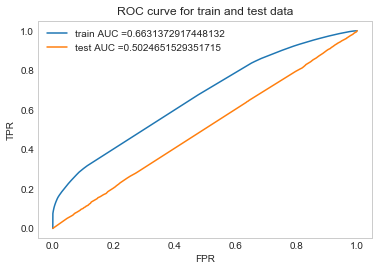

In [836]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_clf_tfidf = DecisionTreeClassifier(max_depth = best_d_tfidf ,min_samples_split = best_s_tfidf ,class_weight="balanced")
dt_clf_tfidf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidf = batch_predict(dt_clf_tfidf, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(dt_clf_tfidf, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

train_auc_tfidf = auc(train_fpr_tfidf, train_tpr_tfidf)
plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(train_auc_tfidf))

test_auc_tfidf = auc(test_fpr_tfidf, test_tpr_tfidf)
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(test_auc_tfidf))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**summary**
From the above curves  we can clearly see that Area under the curve for test data is low compared to the train data.AUC for both 
Train and Test data is above 50% ,so the model is sensible and there is a 22 percent difference between train and test Auc

### Confusion matric 

the maximum value of tpr*(1-fpr) 0.24951569009125174 for threshold 0.479


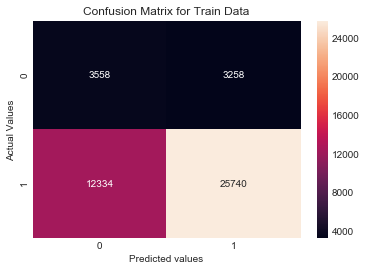

In [837]:
cm_2 = confusion_matrix(y_train, predict(y_train_pred_tfidf, tr_thresholds_tfidf, train_fpr_tfidf, train_fpr_tfidf))                   
cm_tfidf = pd.DataFrame(cm_2 , range(2))
sns.heatmap(cm_tfidf, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

the maximum value of tpr*(1-fpr) 0.23168596937860805 for threshold 0.496


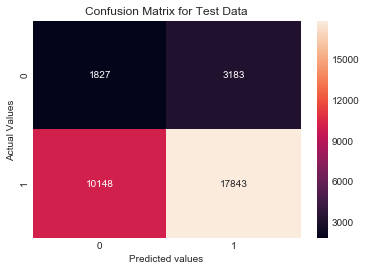

In [838]:
cm_2 = confusion_matrix(y_test, predict(y_test_pred_tfidf, te_thresholds_tfidf, test_fpr_tfidf, test_fpr_tfidf))                   
cm_tfidf = pd.DataFrame(cm_2 , range(2))
sns.heatmap(cm_tfidf, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

### Getting all False Positive datapoints

In [305]:
fp_tfidf = get_FalsePositive(y_test, predict(y_test_pred_tfidf, te_thresholds_tfidf, test_fpr_tfidf, test_fpr_tfidf))

the maximum value of tpr*(1-fpr) 0.24999517930207446 for threshold 0.832


### Word cloud for Falsepositive points

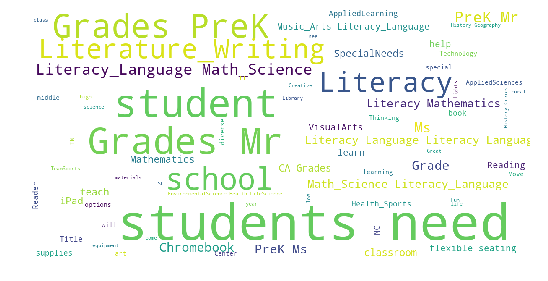

In [306]:
show_wordcloud(fp_tfidf)

### Box plot for price feature in False positive points


[(0.0, 2929.0)]

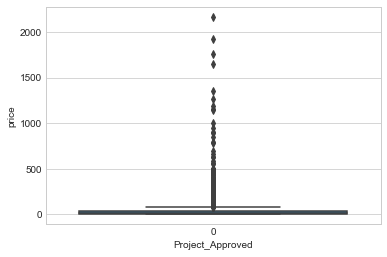

In [429]:
sns.set_style("whitegrid")   
sns.boxplot(x = 'Project_Approved', y = 'price', data = fp_tfidf) 
ax.set(ylim=(min(fp_tfidfw2v['price']),max(fp_tfidfw2v['price'])))

### PDF for 'teacher_number_of_previously_posted_projects' in False positive points

[9.25020048e-01 4.41058540e-02 1.20288693e-02 7.61828388e-03
 2.00481155e-03 4.81154771e-03 1.60384924e-03 1.60384924e-03
 4.00962310e-04 8.01924619e-04]
[  0.   19.2  38.4  57.6  76.8  96.  115.2 134.4 153.6 172.8 192. ]


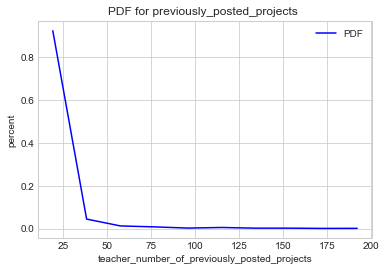

In [308]:
counts,bin_edges =np.histogram(fp_tfidf['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('percent')
plt.title("PDF for previously_posted_projects ")
plt.legend()
plt.show()

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [687]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr_avgw2v = hstack((X_train_essay_avgw2v, X_train_title_avgw2v,X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm,X_train_price_norm)).tocsr()
X_cr_avgw2v= hstack((X_cv_essay_avgw2v,X_cv_title_avgw2v, X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm,X_cv_price_norm)).tocsr()
X_te_avgw2v = hstack((X_test_essay_avgw2v,X_test_title_avgw2v, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm,X_test_price_norm)).tocsr()


### Hyper parameter tuning using simple for loop


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [38:58<00:00, 479.20s/it]

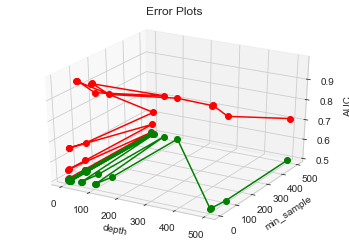

In [639]:
tr_auc_avgw2v, cr_auc_avgw2v = hypertune(X_tr_avgw2v, y_train, X_cr_avgw2v, y_cv)

findind Best depth and Best Min_sample


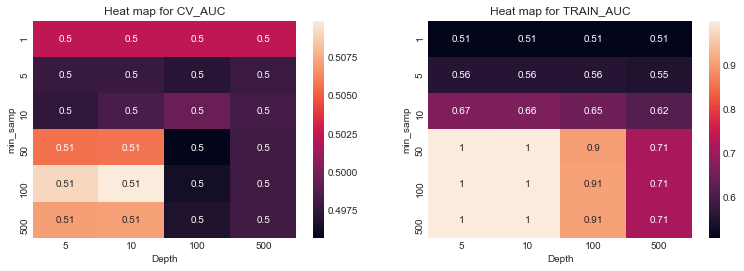

In [699]:
best_parameters(cr_auc_avgw2v, tr_auc_avgw2v)

In [866]:
best_d_avgw2v = 10
best_s_avgw2v = 500

### Roc Curve

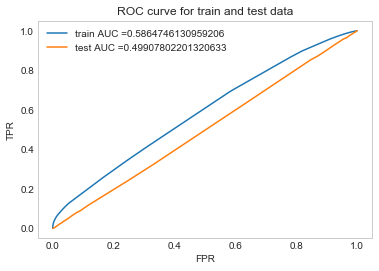

In [867]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_clf_avgw2v = DecisionTreeClassifier(max_depth = best_d_avgw2v,min_samples_split = best_s_avgw2v,class_weight ="balanced")
dt_clf_avgw2v.fit(X_tr_avgw2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_avgw2v = batch_predict(dt_clf_avgw2v, X_tr_avgw2v)    
y_test_pred_avgw2v = batch_predict(dt_clf_avgw2v, X_te_avgw2v)

train_fpr_avgw2v, train_tpr_avgw2v, tr_thresholds_avgw2v = roc_curve(y_train, y_train_pred_avgw2v)
test_fpr_avgw2v, test_tpr_avgw2v, te_thresholds_avgw2v = roc_curve(y_test, y_test_pred_avgw2v)

train_auc_avgw2v = auc(train_fpr_avgw2v, train_tpr_avgw2v)
plt.plot(train_fpr_avgw2v, train_tpr_avgw2v, label="train AUC ="+str(train_auc_avgw2v))

test_auc_avgw2v = auc(test_fpr_avgw2v, test_tpr_avgw2v)
plt.plot(test_fpr_avgw2v, test_tpr_avgw2v, label="test AUC ="+str(test_auc_avgw2v))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**summary**
From the above curves  we can clearly see that Area under the curve for test data is very low compared to the train data.AUC for both 
TTest data is less than 50% so the model is not sensible.

### Confusion Matrix


the maximum value of tpr*(1-fpr) 0.2499999139004607 for threshold 0.514


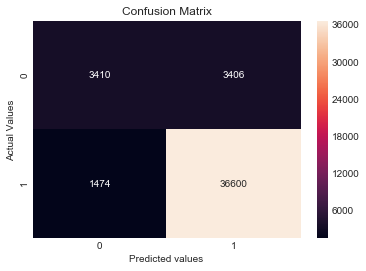

In [322]:
cm_3 = confusion_matrix(y_train, predict(y_train_pred_avgw2v, tr_thresholds_avgw2v, train_fpr_avgw2v, train_fpr_avgw2v))                   
cm_avgw2v = pd.DataFrame(cm_3 , range(2))
sns.heatmap(cm_avgw2v, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

the maximum value of tpr*(1-fpr) 0.24999996015952128 for threshold 0.951


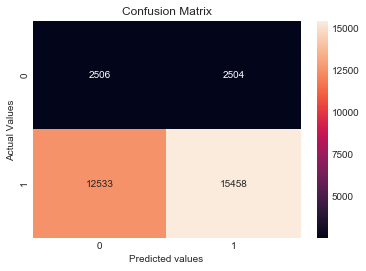

In [323]:
cm_3 = confusion_matrix(y_test, predict(y_test_pred_avgw2v, te_thresholds_avgw2v, test_fpr_avgw2v, test_fpr_avgw2v))                   
cm_avgw2v = pd.DataFrame(cm_3 , range(2))
sns.heatmap(cm_avgw2v, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()            

### Getting all False Positive datapoints

In [324]:
fp_avgw2v = get_FalsePositive(y_test, predict(y_test_pred_avgw2v, te_thresholds_avgw2v, test_fpr_avgw2v, test_fpr_avgw2v))

the maximum value of tpr*(1-fpr) 0.24999996015952128 for threshold 0.951


### Word cloud for Falsepositive points

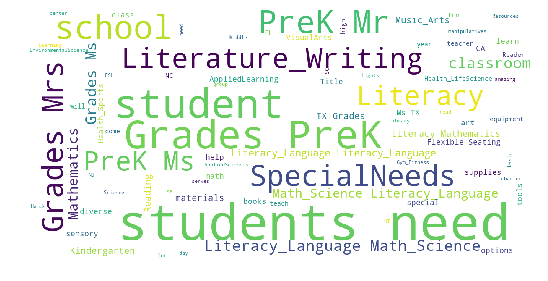

In [325]:
show_wordcloud(fp_avgw2v)

### Box plot for price feature in  False positive points

[(0.0, 2929.0)]

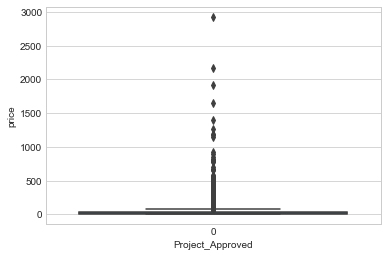

In [432]:
sns.set_style("whitegrid") 

sns.boxplot(x = 'Project_Approved', y = 'price', data = fp_avgw2v) 
ax.set(ylim=(min(fp_tfidfw2v['price']),max(fp_tfidfw2v['price'])))

### PDF for 'teacher_number_of_previously_posted_projects' in False positive points

[9.22923323e-01 4.71246006e-02 1.27795527e-02 5.19169329e-03
 3.99361022e-03 3.99361022e-03 2.39616613e-03 7.98722045e-04
 3.99361022e-04 3.99361022e-04]
[  0.   20.6  41.2  61.8  82.4 103.  123.6 144.2 164.8 185.4 206. ]


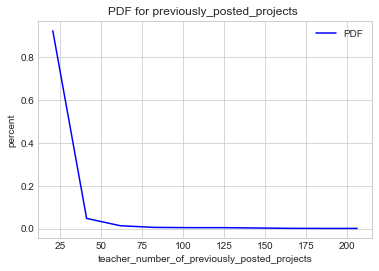

In [327]:
counts,bin_edges =np.histogram(fp_avgw2v['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('percent')
plt.title("PDF for previously_posted_projects ")
plt.legend()
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>


In [642]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr_tfidfw2v = hstack((X_train_essay_weightw2v,X_train_title_weightw2v, X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm,X_train_price_norm)).tocsr()
X_cr_tfidfw2v = hstack((X_cv_essay_weightw2v,X_cv_title_weightw2v, X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm,X_cv_price_norm)).tocsr()
X_te_tfidfw2v = hstack((X_test_essay_weightw2v,X_test_title_weightw2v, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm,X_test_price_norm)).tocsr()


### Hyper parameter tuning using simple for loop

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [40:26<00:00, 492.74s/it]


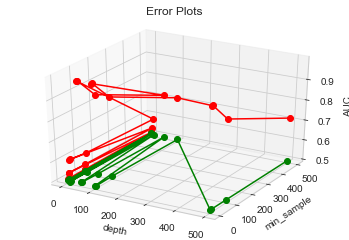

In [534]:
tr_auc_tfidfw2v, cv_auc_tfidfw2v = hypertune(X_tr_tfidfw2v, y_train, X_cr_tfidfw2v, y_cv)

findind Best depth and Best Min_sample


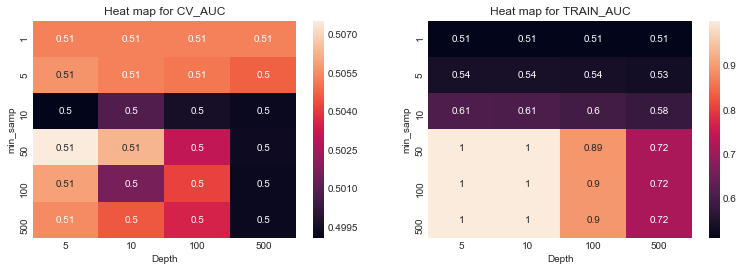


Best Depth is 50, Best Min_sample is 5


In [535]:
best_parameters(cv_auc_tfidfw2v, tr_auc_tfidfw2v)

In [691]:
best_d_tfidfw2v = 10
best_s_tfidfw2v = 5

### Roc Curve

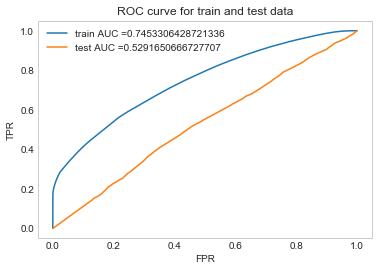

In [692]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_clf_tfidfw2v = DecisionTreeClassifier(max_depth = best_d_tfidfw2v, min_samples_split = best_s_tfidfw2v ,class_weight="balanced")
dt_clf_tfidfw2v.fit(X_tr_tfidfw2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidfw2v = batch_predict(dt_clf_tfidfw2v, X_tr_tfidfw2v)    
y_test_pred_tfidfw2v = batch_predict(dt_clf_tfidfw2v, X_te_tfidfw2v)

train_fpr_tfidfw2v, train_tpr_tfidfw2v, tr_thresholds_tfidfw2v = roc_curve(y_train, y_train_pred_tfidfw2v)
test_fpr_tfidfw2v, test_tpr_tfidfw2v, te_thresholds_tfidfw2v = roc_curve(y_test, y_test_pred_tfidfw2v)

train_auc_tfidfw2v = auc(train_fpr_tfidfw2v, train_tpr_tfidfw2v)
plt.plot(train_fpr_tfidfw2v, train_tpr_tfidfw2v, label="train AUC ="+str(train_auc_tfidfw2v))

test_auc_tfidfw2v = auc(test_fpr_tfidfw2v, test_tpr_tfidfw2v)
plt.plot(test_fpr_tfidfw2v, test_tpr_tfidfw2v, label="test AUC ="+str(test_auc_tfidfw2v))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**summary**
From the above curves  we can clearly see that Area under the curve for test data is low compared to the train data.AUC for both 
Train and Test data is above 50% , and there is a 22 percent difference between train and test Auc this is huge ,so the model is performing very poor

### Confusion Matrix

the maximum value of tpr*(1-fpr) 0.24991990590353547 for threshold 0.812


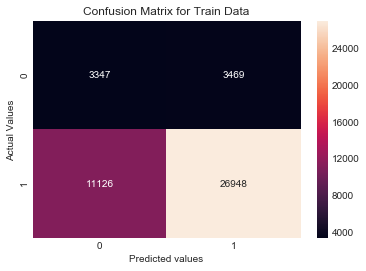

In [336]:
cm_4 = confusion_matrix(y_train, predict(y_train_pred_tfidfw2v, tr_thresholds_tfidfw2v, train_fpr_tfidfw2v, train_fpr_tfidfw2v))                   
cm_tfidfw2v = pd.DataFrame(cm_4 , range(2))
sns.heatmap(cm_tfidfw2v,annot = True, fmt = "d")
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()         

the maximum value of tpr*(1-fpr) 0.2494822331385134 for threshold 0.857


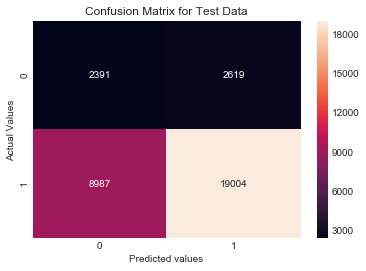

In [337]:
cm_4 = confusion_matrix(y_test, predict(y_test_pred_tfidfw2v, te_thresholds_tfidfw2v, test_fpr_tfidfw2v, test_fpr_tfidfw2v))                   
cm_tfidfw2v = pd.DataFrame(cm_4 , range(2))
sns.heatmap(cm_tfidfw2v,annot = True, fmt = "d")
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()    

### Getting all False Positive datapoints

In [338]:
fp_tfidfw2v = get_FalsePositive(y_test, predict(y_test_pred_tfidfw2v, te_thresholds_tfidfw2v, test_fpr_tfidfw2v, test_fpr_tfidfw2v))

the maximum value of tpr*(1-fpr) 0.2494822331385134 for threshold 0.857


### Word cloud for Falsepositive points

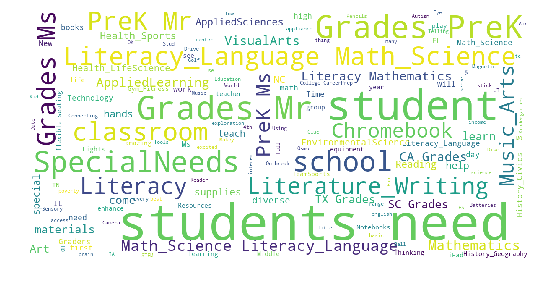

In [339]:
show_wordcloud(fp_tfidfw2v )


### Box plot for price feature in  False positive points

[(0.0, 2929.0)]

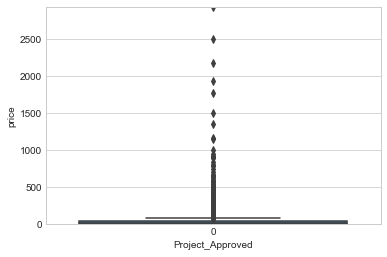

In [421]:
sns.set_style("whitegrid") 
  
ax = sns.boxplot(x = 'Project_Approved', y = 'price',data = fp_tfidfw2v )
ax.set(ylim=(min(fp_tfidfw2v['price']),max(fp_tfidfw2v['price'])))


### PDF for 'teacher_number_of_previously_posted_projects' in False positive points

[9.28598702e-01 4.42917144e-02 1.45093547e-02 3.05460099e-03
 4.96372661e-03 2.29095074e-03 1.14547537e-03 7.63650248e-04
 0.00000000e+00 3.81825124e-04]
[  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


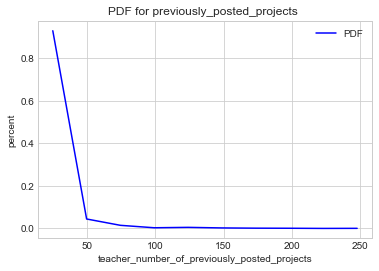

In [341]:
counts,bin_edges =np.histogram(fp_tfidfw2v ['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('percent')
plt.title("PDF for previously_posted_projects ")
plt.legend()
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_ in set-2`</h2>

In [710]:
# Getting top 5k indices
top_5k = dt_clf_tfidf.feature_importances_.argsort()[::-1]
top_5k = top_5k[:5000]

In [711]:
# Selecting top 5k features
X_tr_tfidf = X_tr_tfidf[:,top_5k]
X_cr_tfidf = X_cr_tfidf[:,top_5k]
X_te_tfidf = X_te_tfidf[:,top_5k]

print("Shape of X_tr_tfidf ",X_tr_tfidf.shape)
print("Shape of X_cr_tfidf ",X_cr_tfidf.shape)
print("Shape of X_te_tfidf ",X_te_tfidf.shape)

Shape of X_tr_tfidf  (44890, 5000)
Shape of X_cr_tfidf  (22110, 5000)
Shape of X_te_tfidf  (33001, 5000)


## Hyper parameter tuning for Logistic Regression


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:44<00:00,  3.14s/it]

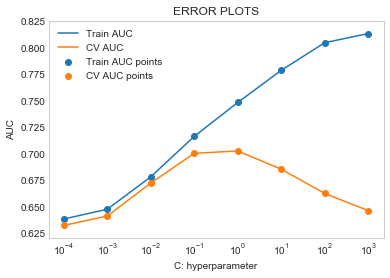

In [712]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

train_auc = []
cv_auc = []
Cs = [1000,100,10,1,0.1,0.01,0.001,0.0001]
for i in tqdm(Cs):
    logi_clf = LogisticRegression(C=i ,class_weight="balanced")
    logi_clf.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(logi_clf, X_tr_tfidf)    
    y_cv_pred = batch_predict(logi_clf, X_cr_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(Cs, train_auc, label='Train AUC')
plt.plot(Cs , cv_auc, label='CV AUC')

plt.scatter(Cs, train_auc, label='Train AUC points')
plt.scatter(Cs, cv_auc, label='CV AUC points')

plt.xscale("log")
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

we can see that at C = 1 we are getting CV Auc high and after that trsin AUC keeps increasing and CV AUC keeps decreasing 

In [715]:
best_C_tfidf = 1

## Applying Logistic Regression with Best hyperparameter C

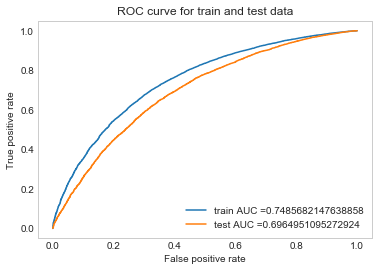

In [716]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

logi_clf = LogisticRegression(C=best_C_tfidf ,class_weight="balanced")
logi_clf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidf = batch_predict(logi_clf, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(logi_clf, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

train_auc_tfidf = auc(train_fpr_tfidf, train_tpr_tfidf)
plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(train_auc_tfidf))

test_auc_tfidf = auc(test_fpr_tfidf, test_tpr_tfidf)
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(test_auc_tfidf))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

We can see that AUC is higher for training points and less for Test points and the difference is 5 and both AUC are greater than
0.5. so the model is sensible

## Confusion matrix

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.412


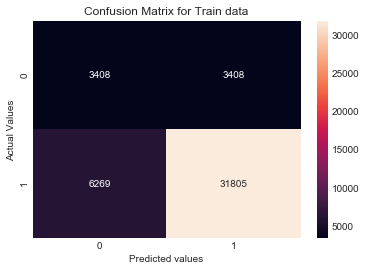

In [717]:
cm_1 = confusion_matrix(y_train, predict(y_train_pred_tfidf, tr_thresholds_tfidf, train_fpr_tfidf, train_fpr_tfidf))                   
cm_tfidf = pd.DataFrame(cm_1 , range(2))
sns.heatmap(cm_tfidf, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.438


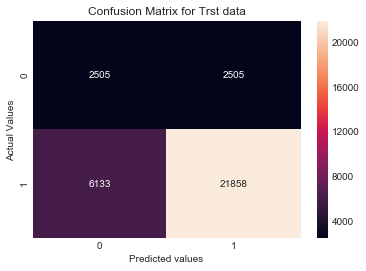

In [718]:
cm_2 = confusion_matrix(y_test, predict(y_test_pred_tfidf, te_thresholds_tfidf, test_fpr_tfidf, test_fpr_tfidf))                   
cm_tfidf = pd.DataFrame(cm_2 , range(2))
sns.heatmap(cm_tfidf, annot = True, fmt = "d")
plt.title("Confusion Matrix for Trst data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()             

### Getting all False Positive points

In [434]:
fp_top5k = get_FalsePositive(y_test, predict(y_test_pred_tfidf, te_thresholds_tfidf, test_fpr_tfidf, test_fpr_tfidf))

the maximum value of tpr*(1-fpr) 0.24991569754702173 for threshold 0.922


### Word cloud for all False Postive points

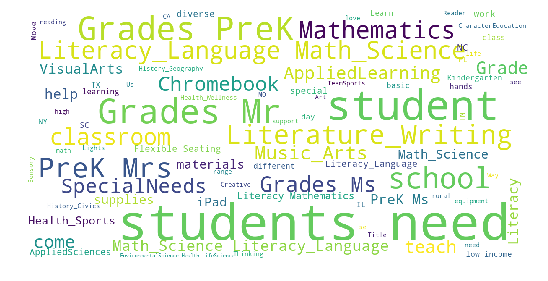

In [435]:
show_wordcloud(fp_top5k)

### Box plot for 'price feature' in False Positive Points

[(0.0, 2929.0)]

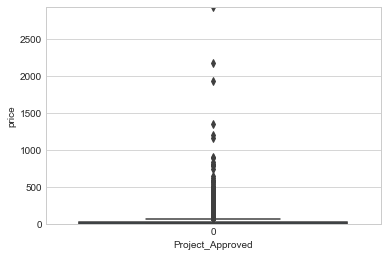

In [436]:
sns.set_style("whitegrid") 
  
ax = sns.boxplot(x = 'Project_Approved', y = 'price',data = fp_top5k )
ax.set(ylim=(min(fp_tfidfw2v['price']),max(fp_tfidfw2v['price'])))

### PDF for 'teacher_number_of_previously_posted_projects' in False Positive points  

[9.06311250e-01 5.80164641e-02 1.60721286e-02 7.05605645e-03
 1.96001568e-03 3.13602509e-03 3.92003136e-03 1.96001568e-03
 3.92003136e-04 1.17600941e-03]
[  0.   17.7  35.4  53.1  70.8  88.5 106.2 123.9 141.6 159.3 177. ]


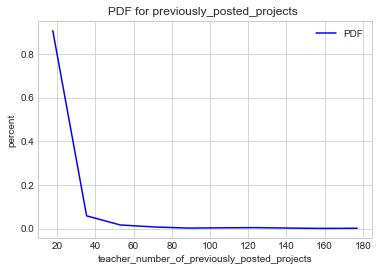

In [437]:
counts,bin_edges =np.histogram(fp_top5k['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('percent')
plt.title("PDF for previously_posted_projects ")
plt.legend()
plt.show()

<h1>3. Conclusion</h1>

In [870]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
   
pt = PrettyTable()

pt.field_names = ["Vectorizer", "Model", "Hyperparameter","Train AUC","Test Auc"]

pt.add_row(["BOW", "Decision Tree", "Depth = "+str(best_d_bow)+", Min_samp = "+str(best_s_bow), "0.61","0.54"])
pt.add_row(["TFIDF", "Decision Tree", "Depth = "+str(best_d_tfidf)+", Min_samp = "+str(best_s_tfidf), "0.66","0.50"])
pt.add_row(["AvgW2V", "Decision Tree", "Depth = "+str(best_d_avgw2v)+", Min_samp = "+str(best_s_avgw2v), "0.58","0.49"])
pt.add_row(["TFIdf W2V", "Decision Tree", "Depth = "+str(best_d_tfidfw2v)+", Min_samp = "+str(best_s_tfidfw2v), "0.74","0.52"])
pt.add_row(["TFIdf(top 5K features)", "Logistic Regression", "C = "+str(best_C_tfidf), "0.74","0.69"])

print(pt)


+------------------------+---------------------+----------------------------+-----------+----------+
|       Vectorizer       |        Model        |       Hyperparameter       | Train AUC | Test Auc |
+------------------------+---------------------+----------------------------+-----------+----------+
|          BOW           |    Decision Tree    | Depth = 50, Min_samp = 500 |    0.61   |   0.54   |
|         TFIDF          |    Decision Tree    | Depth = 50, Min_samp = 500 |    0.66   |   0.50   |
|         AvgW2V         |    Decision Tree    | Depth = 10, Min_samp = 500 |    0.58   |   0.49   |
|       TFIdf W2V        |    Decision Tree    |  Depth = 10, Min_samp = 5  |    0.74   |   0.52   |
| TFIdf(top 5K features) | Logistic Regression |           C = 1            |    0.74   |   0.69   |
+------------------------+---------------------+----------------------------+-----------+----------+


1. Here if we see Decision tree with BOW variant is performing well compared to other variants as the test AUC is close to Train AUc
2. if we notice Decision Tree with AVGW2V and TFIDFW2v Variants is performing very poor as their test AUC is very low compared to Train AUC.
3. Here Logistic Regression performing reasonably well as we have taken top 5000 features using Decision tree with TFIDF variant.
4. When we compare all the nodels here logistic Regression with top 5000 features performing very well.